# The Harmonic Oscillator Strikes Back

*Note:* Much of this is adapted/copied from https://flothesof.github.io/harmonic-oscillator-three-methods-solution.html

This week we continue our adventures with the harmonic oscillator.

![1D Harmonic Oscillator](ho.png) 

The harmonic oscillator is a system that, when displaced from its equilibrium position, experiences a restoring force F proportional to the displacement x:

$$F=-kx$$

The potential energy of this system is 

$$V = {1 \over 2}k{x^2}$$

These are sometime rewritten as

$$ F=- \omega_0^2 m x, \text{ }  V(x) = {1 \over 2} m \omega_0^2 {x^2}$$

Where $\omega_0  = \sqrt {{k \over m}} $

If the equilibrium value of the harmonic oscillator is not zero, then 

$$ F=- \omega_0^2 m (x-x_{eq}), \text{ }  V(x) = {1 \over 2} m \omega_0^2 (x-x_{eq})^2$$

## 1. Harmonic oscillator from last time (with some better defined conditions)

Applying the harmonic oscillator force to Newton's second law leads to the following second order differential equation

$$ F = m a $$

$$ F= -m \omega_0^2 (x-x_{eq}) $$

$$ a = - \omega_0^2 (x-x_{eq}) $$

$$ x(t)'' = - \omega_0^2 (x-x_{eq}) $$

The final expression can be rearranged into a second order homogenous differential equation, and can be solved using the methods we used above

This is already solved to remind you how we found these values

In [5]:
import sympy as sym
sym.init_printing()

**Note** that this time we define some of the properties of the symbols. Namely, that the frequency is always positive and real and that the positions are always real

In [6]:
omega0,t=sym.symbols("omega_0,t",positive=True,nonnegative=True,real=True)
xeq=sym.symbols("x_{eq}",real=True)
x=sym.Function("x",real=True)
x(t),omega0

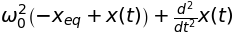

In [7]:
dfeq=sym.Derivative(x(t),t,2)+omega0**2*(x(t)-xeq)
dfeq

In [8]:
sol = sym.dsolve(dfeq)
sol

In [9]:
sol,sol.args[0],sol.args[1]

**Note** this time we define the initial positions and velocities as real

In [8]:
x0,v0=sym.symbols("x_0,v_0",real=True)
ics=[sym.Eq(sol.args[1].subs(t, 0), x0),
     sym.Eq(sol.args[1].diff(t).subs(t, 0), v0)]
ics

In [9]:
solved_ics=sym.solve(ics)
solved_ics

### 1.1 Equation of motion for $x(t)$

In [10]:
full_sol = sol.subs(solved_ics[0])
full_sol

### 1.2 Equation of motion for $p(t)$

In [50]:
m=sym.symbols("m",positive=True,nonnegative=True,real=True)
p=sym.Function("p")
sym.Eq(p(t),m*sol.args[1].subs(solved_ics[0]).diff(t))

## 2. Time average values for a harmonic oscillator

If we want to understand the average value of a time dependent observable, we need to solve the following integral


$${\left\langle {A(t)} \right\rangle}_t  = \begin{array}{*{20}{c}}
{\lim }\\
{\tau  \to 0}
\end{array}\frac{1}{\tau }\int\limits_0^\tau  {A(t)dt} $$

### 2.1 Average position ${\left\langle {x} \right\rangle}_t$ for a harmonic oscillator

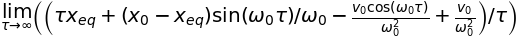

In [12]:
tau=sym.symbols("tau",nonnegative=True,real=True)
xfunc=full_sol.args[1]
xavet=(xfunc.integrate((t,0,tau))/tau).limit(tau,sym.oo)
xavet

The computer does not always make the best choices the first time. If you treat each sum individually this is not a hard limit to do by hand. The computer is not smart. We can help it by inseting an `expand()` function in the statement

In [13]:
xavet=(xfunc.integrate((t,0,tau))/tau).expand().limit(tau,sym.oo)
xavet

### 2.2 Excercise: Calculate the average momenta  ${\left\langle {p} \right\rangle}_t$ for a harmonic oscillator

In [53]:
import sympy as sym
sym.init_printing()

m=sym.symbols("m",positive=True,nonnegative=True,real=True)
p=sym.Function("p")
p=sym.Eq(p(t),m*sol.args[1].subs(solved_ics[0]).diff(t))

tau=sym.symbols("tau",nonnegative=True,real=True)
pfunc=p.args[1]
pavet=(pfunc.integrate((t,0,tau))/tau).limit(tau,sym.oo)
pavet

pavet=(pfunc.integrate((t,0,tau))/tau).expand().limit(tau,sym.oo)
pavet

### 2.3 Exercise: Calculate the average kinetic energy of a harmonic oscillator

In [61]:
import sympy as sym
sym.init_printing()

m=sym.symbols("m",positive=True,nonnegative=True,real=True)
p=sym.Function("p")
p=sym.Eq(p(t),m*sol.args[1].subs(solved_ics[0]).diff(t))

tau=sym.symbols("tau",nonnegative=True,real=True)
pfunc=p.args[1]

ke=pfunc**2/(2*m)
ke

keavet=(ke.integrate((t,0,tau))/tau).limit(tau,sym.oo)
keavet

keavet=(ke.integrate((t,0,tau))/tau).expand().limit(tau,sym.oo)
keavet

## 3.  Ensemble (Thermodynamic) Average values for a harmonic oscillator

If we want to understand the thermodynamics ensemble average value of an observable, we need to solve the following integral. 


$${\left\langle {A(t)} \right\rangle}_{T}  = \frac{\int{A e^{-\beta H}dqdp}}{\int{e^{-\beta H}dqdp} } $$

You can think of this as a Temperature average instead of a time average.

Here $\beta=\frac{1}{k_B T}$ and the classical Hamiltonian, $H$ is

$$ H = \frac{p^2}{2 m} + V(q)$$

**Note** that the factors of $1/h$ found in the classical partition function cancel out when calculating average values

### 3.1 Average position ${\left\langle {x} \right\rangle}_t$ for a harmonic oscillator

For a harmonic oscillator with equilibrium value $x_{eq}$, the Hamiltonian is 
$$ H = \frac{p^2}{2 m} + \frac{1}{2} m \omega_0 (x-x_{eq})^2 $$

First we will calculate the partition function $\int{e^{-\beta H}dqdp}$

In [205]:
k,T=sym.symbols("k,T",positive=True,nonnegative=True,real=True)
xT,pT=sym.symbols("x_T,p_T",real=True)
ham=sym.Rational(1,2)*(pT)**2/m + sym.Rational(1,2)*m*omega0**2*(xT-xeq)**2
beta=1/(k*T)
bolz=sym.exp(-beta*ham)
z=sym.integrate(bolz,(xT,-sym.oo,sym.oo),(pT,-sym.oo,sym.oo))
z

Then we can calculate the numerator $\int{A e^{-\beta H}dqdp}$


In [213]:
numx=sym.integrate(xT*bolz,(xT,-sym.oo,sym.oo),(pT,-sym.oo,sym.oo))
numx

And now the average value

In [214]:
xaveT=numx/z
xaveT

### 3.2 Exercise: Calculate the average momenta  ${\left\langle {p} \right\rangle}_t$ for a harmonic oscillator

After calculating the value, explain why you think you got this number 

In [72]:
k,T=sym.symbols("k,T",positive=True,nonnegative=True,real=True)
xT,pT=sym.symbols("x_T,p_T",real=True)
ham=sym.Rational(1,2)*(pT)**2/m + sym.Rational(1,2)*m*omega0**2*(xT-xeq)**2
beta=1/(k*T)
bolz=sym.exp(-beta*ham)
z=sym.integrate(bolz,(xT,-sym.oo,sym.oo),(pT,-sym.oo,sym.oo))
z

nump=sym.integrate(pT*bolz,(xT,-sym.oo,sym.oo),(pT,-sym.oo,sym.oo))
nump

paveT=nump/z
paveT

### 3.3 Exercise: Calculate the average kinetic energy

The answer you get here is a well known result related to the energy equipartition theorem

In [87]:
k,T=sym.symbols("k,T",positive=True,nonnegative=True,real=True)
xT,pT=sym.symbols("x_T,p_T",real=True)
ham=sym.Rational(1,2)*(pT)**2/m + sym.Rational(1,2)*m*omega0**2*(xT-xeq)**2
beta=1/(k*T)
bolz=sym.exp(-beta*ham)
z=sym.integrate(bolz,(xT,-sym.oo,sym.oo),(pT,-sym.oo,sym.oo))
z

numke=sym.integrate(pT**2/(2*m)*bolz,(xT,-sym.oo,sym.oo),(pT,-sym.oo,sym.oo))
numke

keaveT=nump/z
keaveT

# Back to the lecture

## 4. Exercise Verlet integrators

In this exercise we will write a routine to solve for the equations of motion for a hamonic oscillator.

Plot the positions and momenta (seprate plots) of the harmonic oscillator as a functions of time.

Calculaate trajectories using the following methods:
1. Exact solution
2. Simple taylor series expansion
3. Predictor-corrector method
4. Verlet algorithm
5. Leapfrog algorithm
6. Velocity Verlet algorithm

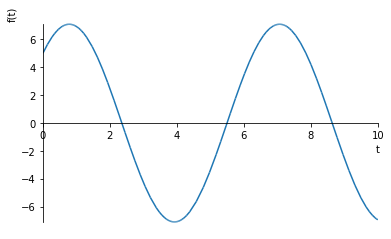

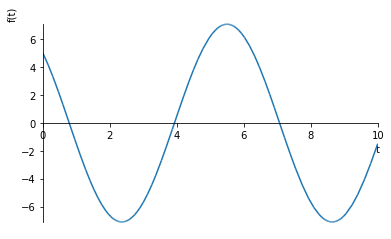

In [2]:
#exact solution

import sympy as sym
sym.init_printing()

#defining variables and variable conditions of differential
omega0,t=sym.symbols("omega_0,t",positive=True,nonnegative=True,real=True)
xeq=sym.symbols("x_{eq}",real=True)
x=sym.Function("x",real=True)

#solving ordinary differential eq
dfeq=sym.Derivative(x(t),t,2)+omega0**2*(x(t)-xeq)
solve=sym.dsolve(dfeq)

#defining variables and variable conditions of pos and mom
x0,v0=sym.symbols("x_0,v_0",real=True)
#initial conditions of pos and mom
inicon=[sym.Eq(solve.args[1].subs(t, 0), x0),
        sym.Eq(solve.args[1].diff(t).subs(t, 0), v0)]
#solving for constants
iniconsolved=sym.solve(inicon)

#eq of pos using solved constants
pos=solve.subs(iniconsolved[0])
pos
#eq of vel using solved constants
m=sym.symbols("m",positive=True,nonnegative=True,real=True)
v=sym.Function("v")
vel=sym.Eq(v(t),solve.args[1].subs(iniconsolved[0]).diff(t))

#plotting pos and mom by choosing initial conditions
posplot=pos.subs({x0:5,xeq:0,v0:5,omega0:1})
velplot=vel.subs({x0:5,xeq:0,v0:5,omega0:1})
sym.plot(posplot.rhs,(t,0,10)),sym.plot(velplot.rhs,(t,0,10))

pos,vel

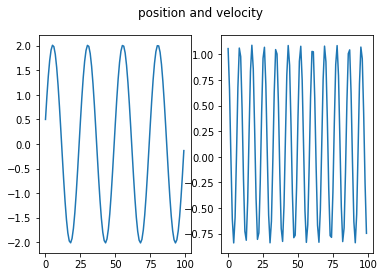

In [3]:
#simple taylor series expansion
#xt=xt0+(pt0/m)*deltat
#pt=pt0+(mat0)*deltat

import sympy as sym
sym.init_printing()

#naming variables and setting recursion
xt0=0
t=0.5
vt0=1
pos=[]
for i in range(0,100):
    vt=vt0+1/2*t**2*-xt0
    vt0=vt
    xt=xt0+vt0*t
    xt0=xt
    pos.append(xt)
    
pt0=0
t=0.5
at0=1
vel=[]
for i in range(0,100):
    at=at0+1/2*t**2-vt0
    at0=at
    vt=vt0+at0*t
    vt0=vt
    vel.append(vt)

#plotting
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('position and velocity')
ax1.plot(pos)
ax2.plot(vel)

In [54]:
#predictor corrector method
#don't

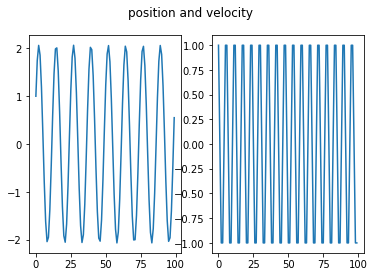

In [90]:
#verlet algorithm
#r(t+dt)=2r(t)-r(t-dt)+dt**2*a
#v(t)=(r(t+dt)-r(t-dt))/2dt

import sympy as sym
sym.init_printing()

#naming variables and setting recursion
xt1=1
xt2=0
t=0.5
pos=[]

#t0=t+dt
#t1=t
#t2=t-dt
for i in range(0,100):
    xt0=2*xt1-xt2+t**2*-xt1
    xt2=xt1
    xt1=xt0
    pos.append(xt2)
    
xt0=0
xt2=1
t=2
vel=[]
for i in range(0,100):
    vt=(xt2-xt0)/2*t
    xt0=xt2
    xt2=vt
    vel.append(vt)

#plotting
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('position and velocity')
ax1.plot(pos)
ax2.plot(vel)

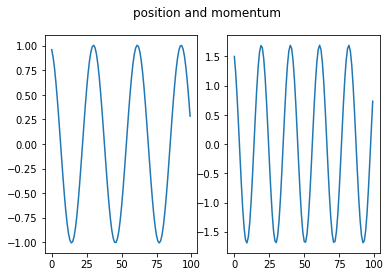

In [70]:
#leapfrog
#r(t+dt)=r(t)+dtv(t+1/2dt)
#v(t+1/2dt)=v(t-1/2dt)+dta(t)
#v(t)=1/2(v(t+1/2dt)+v(t-1/2dt))

import sympy as sym
sym.init_printing()

#naming variables and setting recursion
xt0=1
vtminushalfdt=0
t=0.2
pos=[]
for i in range(0,100):
    vtplushalfdt=vtminushalfdt+t*-xt0
    vtminushalfdt=vtplushalfdt
    xt1=xt0+t*vtplushalfdt
    xt0=xt1
    pos.append(xt1)

xt0=1
t=0.3
vtminushalfdt=1
vtplushalfdt=2
vel=[]
for i in range(0,100):
    vt=1/2*(vtplushalfdt+vtminushalfdt)
    vtminushalfdt=vt
    vtplushalfdt=vtminushalfdt+t*-xt0
    vtminushalfdt=vtplushalfdt
    xt1=xt0+t*vtplushalfdt
    xt0=xt1
    vel.append(vt)

#plotting
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('position and velocity')
ax1.plot(pos)
ax2.plot(vel)

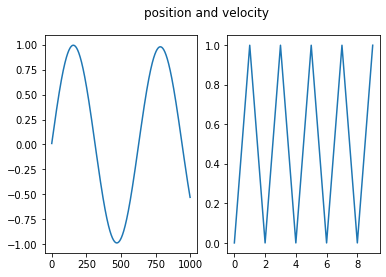

In [95]:
#velocity verlet
#r(t+dt)=r(t)+dtv(t)+1/2dt^2a(t)
#v(t+dt)=v(t)+1/2dt(a(t)+a(t+dt))
#1st step: v(t+1/2dt)=v(t)+1/2dta(t)
#2nd step: v(t+dt)=v(t+1/2dt)+1/2dta(t+dt)

import sympy as sym
sym.init_printing()

#naming variables and setting recursion

dt=0.01
x0=0
v0=1
pos=[]
for i in range(0,1000):
    x1=x0+v0*dt+1/2*-x0*dt**2
    x0=x1
    v1=v0+1/2*(-x1-x0)*dt
    v0=v1
    pos.append(x1)
    
xt0=1
dt=2
vt0=1
vel=[]
for i in range(0,10):
    vtplushalfdt=vt0+1/2*dt*-xt0
    xt0=vtplushalfdt
    vel.append(vtplushalfdt)

#plotting
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('position and velocity')
ax1.plot(pos)
ax2.plot(vel)